### Курс "Python для исследователя", осень 2022

# Визуализация данных с помощью библиотек matplotlib и seaborn

![alt text](Python08-matplotlib_extra/logo2_compressed.svg)

Matplotlib - один из самых мощных инструментов визуализации данных.\
Эта библиотека включает множество различных методов визуализации данных,\
такие как 2D и 3D графики, гистограммы, круговые и столбцовые диаграммы, и многое другое.\
Все типы графиков обладают множеством возможностей конфигурирования.\
Как правило, Matplotlib используется в комплексе с другими инструментами\
для работы с данными, такими как Numpy, Pandas и OpenCV.\
\
Скачать код и ознакомиться с документацией вы можете на сайте [https://matplotlib.org/](https://matplotlib.org/)

Для возможности отображения графиков в ячейках Jupyter необходимо\
выполнить следующую инструкцию:

In [1]:
%matplotlib inline

Импорт модуля:

In [2]:
import matplotlib.pyplot as plt

Импортируем прочие необходимые для семинара библиотеки:

In [3]:
import sys
import os
import numpy as np
import random
import pandas as pd
import time

Будем использовать датасет Covid-19, доступный по адресу: [https://github.com/datasets/covid-19](https://github.com/datasets/covid-19)\
\
Необходимо выполнить следующие команды:
```
git clone https://github.com/datasets/covid-19 
cd covid-19
pip install -r scripts/requirements.txt
python scripts/process_worldwide.py
python scripts/process_us.py
```
При необходимости раскомментируйте и выполните код в следующей ячейке:

In [4]:
# !git clone https://github.com/datasets/covid-19
# !cd covid-19; git pull; pip install -r scripts/requirements.txt; \
# python scripts/process_worldwide.py; \
# python scripts/process_us.py

Загружаем данные из CSV-таблицы с помощью pandas:

In [5]:
aggr_data = pd.read_csv("./covid-19/data/countries-aggregated.csv")

Табличные данные содержат количество подтверждённых случаев\
заболевания Covid-19, выздоровевших и умерших для каждой страны\
на каждую дату, начиная с 22 января 2020 года

In [6]:
aggr_data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


Далее нас будут интересовать только данные по странам с подтверждёнными случаями заболеваний

In [7]:
aggr_data = aggr_data[aggr_data["Confirmed"] > 0]

Получим данные заболеваемости по России

In [8]:
russia_data = aggr_data[aggr_data['Country'] == 'Russia'][["Date", "Confirmed"]]

Pandas имеет встроенные функции визуализации данных

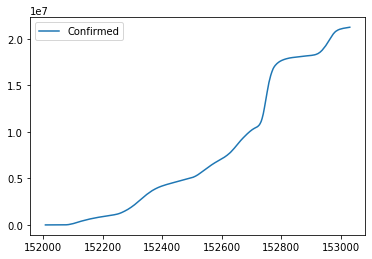

In [9]:
russia_data.plot()

Matplotlib позволяет работать в "функциональном" и "объектном" стилях.\
Функциональный - через вызовы функций модуля plt.\
Объектный - через создание объектов axes и вызова их методов.

Приведём данные в формат numpy и разделим их по столбцам

In [10]:
def get_row(data, country, col_name):
    """Функция, извлекающая все данные
    заданного типа для заданной страны и соответствующие им даты
    """
    country_data = data[(data['Country'] == country)]
    date = country_data["Date"].to_numpy()
    
    dates_np = np.array([np.datetime64(d) for d in date])
    values_np = country_data[col_name].to_numpy()
    return dates_np, values_np

Простой пример построения нескольких графиков.\
Построим два графика зависимости числа заболевших,\
и умерших от Covid-19 граждан России.\
\
Формат вызова функции построения графика: \
plt.plot(x, y, label, ...)\
\
plt.grid() - отобразить сетку

In [11]:
dates_confirmed, confirmed = get_row(aggr_data, "Russia", "Confirmed")
dates_deaths, deaths = get_row(aggr_data, "Russia", "Deaths")

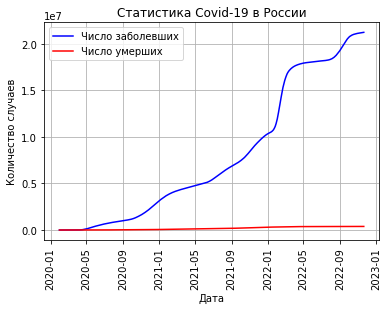

In [12]:
plt.plot(dates_confirmed, confirmed, label="Число заболевших", color="b")
plt.plot(dates_deaths, deaths, label="Число умерших", color="#FF0000")
plt.grid() # Отобразим сетку
plt.xlabel("Дата") # Название оси X
plt.xticks(rotation=90) # Поворот значений по оси X
plt.ylabel("Количество случаев") # Название оси Y
plt.title("Статистика Covid-19 в России") # Название графика
plt.legend() # Отобразить легенду
plt.savefig("russia_stats.png") # Любой график можно сохранить в файл
plt.show()

Отобразим графики заболеваемости России, США и Италии.\
\
Для этого с помощью функции subplots создадим объект контейнера графиков и шесть графиков внутри него:\
fig - контейнер графиков\
ax - список из шести графиков\
\
ax.set_yscale("log") позволяет использовать логарифмическую шкалу по оси y\
ax.label_outer() позволяет спрятать надписи вдоль общей оси для всех графиков, кроме нижнего

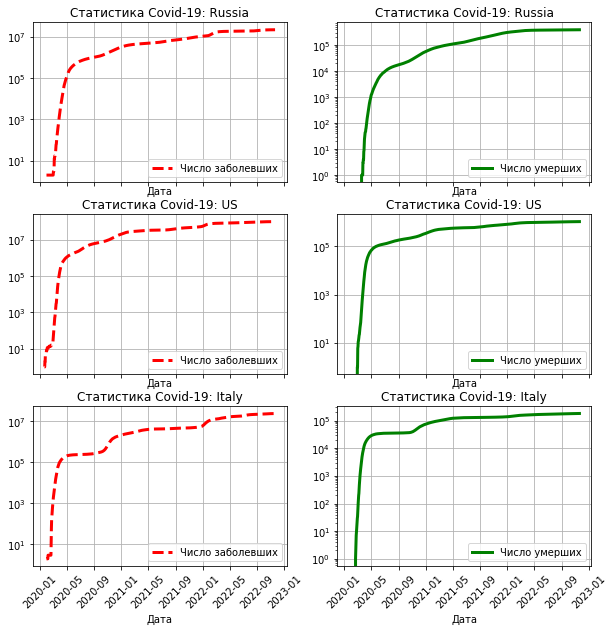

In [13]:
countries = ["Russia", "US", "Italy"]
# Создаём контейнер с тремя графиками (по числу стран)
# Аргумент figsize позволяет задать размер контейнера (в дюймах)
fig, ax = plt.subplots(nrows=len(countries), ncols=2, figsize=(10,10), sharex=True)
for i, country in enumerate(countries):
    dates_confirmed, confirmed = get_row(aggr_data, country, "Confirmed")
    dates_deaths, deaths = get_row(aggr_data, country, "Deaths")
    covid_data = [
        (dates_confirmed, confirmed, "Число заболевших"),
        (dates_deaths, deaths, "Число умерших")
    ]
    for j, data in enumerate(covid_data):
        dates, number, label = data
        color = "r" if j == 0 else "g"
        linestyle = "--" if j == 0 else "-"
        ax[i][j].plot(dates, number, label=label, linewidth=3, color=color, linestyle=linestyle)
        ax[i][j].grid()
        ax[i][j].set_yscale("log") # Логарифмическая шкала
        ax[i][j].set_xlabel("Дата")
        ax[i][j].set_title(f"Статистика Covid-19: {country}")
        ax[i][j].legend()
        ax[i][j].tick_params(axis='x', rotation=45) # Поворот надписей на оси X на 45 градусов
plt.show()

Таблица reference.csv содержит основные данные по каждой стране:\
Координаты, население, название столицы и т.п.

In [14]:
ref_data = pd.read_csv("./covid-19/data/reference.csv")
ref_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0


In [15]:
ref_data[ref_data["iso3"].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
139,9999,NaN,NaN,NaN,NaN,NaN,NaN,Diamond Princess,NaN,NaN,Diamond Princess,NaN
444,8888,NaN,NaN,NaN,NaN,NaN,NaN,MS Zaandam,NaN,NaN,MS Zaandam,NaN
512,2020,NaN,NaN,NaN,NaN,NaN,NaN,Summer Olympics 2020,35.6491,139.7737,Summer Olympics 2020,NaN
513,2022,NaN,NaN,NaN,NaN,NaN,NaN,Winter Olympics 2022,39.9042,116.4074,Winter Olympics 2022,NaN


Страны содержат непустой код ISO3

In [16]:
ref_data = ref_data[ref_data["iso3"].notna()] # Исключаем не-страны (напр., "Diamond Princess")

Поле 'Province_State' содержит название штата или провинции, если данная строка таблицы содержит данные не целой страны, а её части.

Для нашего анализа необходимы только страны целиком, поэтому провинции необходимо исключить.

In [17]:
ref_data[ref_data['Province_State'].notna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
17,5601,BE,BEL,56.0,NaN,NaN,Antwerp,Belgium,51.219500,4.402400,"Antwerp, Belgium",1869730.0
18,5602,BE,BEL,56.0,NaN,NaN,Brussels,Belgium,50.850300,4.351700,"Brussels, Belgium",1218255.0
19,5603,BE,BEL,56.0,NaN,NaN,East Flanders,Belgium,51.036200,3.737300,"East Flanders, Belgium",1525255.0
20,5604,BE,BEL,56.0,NaN,NaN,Flemish Brabant,Belgium,50.916700,4.583300,"Flemish Brabant, Belgium",1155843.0
21,5605,BE,BEL,56.0,NaN,NaN,Hainaut,Belgium,50.525700,4.062100,"Hainaut, Belgium",1346840.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4316,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4317,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4318,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4319,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [18]:
ref_data = ref_data[ref_data['Province_State'].isna()]

In [19]:
ref_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0


Построим гистограмму смертности по странам мира.\
Функция plt.hist() осуществляет отображение гистограммы

In [20]:
def get_country_info(data, country):
    """Вспомогательная функция, которая возвращает широту и долготу страны, а также численность населения
    """
    lat = data[(data['Combined_Key'] == country)]["Lat"].to_numpy()
    lon = data[(data['Combined_Key'] == country)]["Long_"].to_numpy()
    pop = data[(data['Combined_Key'] == country)]["Population"].to_numpy()
    return lat[0], lon[0], int(pop[0])

In [21]:
all_countries = ref_data["Combined_Key"].to_numpy() # Названия всех стран мира
rel_deaths = []
total_deaths = 0
total_confirmed = 0
for country in all_countries:
    _, confirmed = get_row(aggr_data, country, "Confirmed")
    _, deaths = get_row(aggr_data, country, "Deaths")
    if len(deaths) > 0 and len(confirmed) > 0:
        current_confirmed = confirmed[-1] # Текущее значение подтверждённых случаев
        current_deaths = deaths[-1] # Текущее значение умерших
        rel_deaths.append(100 * current_deaths / current_confirmed)
        total_deaths += current_deaths
        total_confirmed += current_confirmed
    else:
        rel_deaths.append(np.nan)
worldwide_rel_death = 100 * total_deaths / total_confirmed

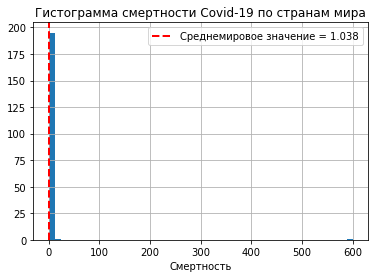

In [22]:
plt.hist(rel_deaths, bins=50) # параметр bins задаёт количество столбцов
plt.axvline(worldwide_rel_death, color='r', linestyle='dashed',
            linewidth=2, label=f"Среднемировое значение = {worldwide_rel_death:.3f}") 
plt.grid()
plt.xlabel("Смертность")
plt.title("Гистограмма смертности Covid-19 по странам мира")
plt.legend()
plt.show()

Найдём страну с максимальной смертностью:

In [23]:
worst_country = all_countries[np.nanargmax(rel_deaths)]
_, tconfirmed = get_row(aggr_data, worst_country, "Confirmed")
_, tdeaths = get_row(aggr_data, worst_country, "Deaths")
mortality = 100 * tdeaths[-1] / tconfirmed[-1]
print(f"Confirmed cases in {worst_country}: {tconfirmed[-1]}, deaths {tdeaths[-1]}, mortality: {mortality:.02f}%")

Confirmed cases in Korea, North: 1, deaths 6, mortality: 600.00%


In [24]:
rel_deaths = np.array(rel_deaths)
rel_deaths = rel_deaths[rel_deaths < 100.0]

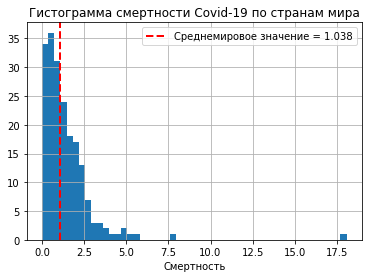

In [25]:
plt.hist(rel_deaths, bins=50) # параметр bins задаёт количество столбцов
plt.axvline(worldwide_rel_death, color='r', linestyle='dashed',
            linewidth=2, label=f"Среднемировое значение = {worldwide_rel_death:.3f}") 
plt.grid()
plt.xlabel("Смертность")
plt.title("Гистограмма смертности Covid-19 по странам мира")
plt.legend()
plt.show()

Построим круговую диаграмму заболеваемости Covid-19\
Функция plt.pie() осуществляет отображение круговой диаграммы

In [26]:
total_confirmed = 0
total_deaths = 0
total_recovered = 0
for country in all_countries:
    _, confirmed = get_row(aggr_data, country, "Confirmed")
    _, deaths = get_row(aggr_data, country, "Deaths")
    if len(confirmed) > 0:
        total_confirmed += confirmed[-1]
    if len(deaths) > 0:
        total_deaths += deaths[-1]
total_recovered = total_confirmed - total_deaths

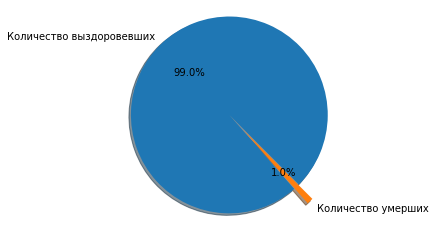

In [27]:
pie_data = [total_recovered, total_deaths]
explode = (0, 0.2) # Выделение некоторых секторов
pie_labels = ["Количество выздоровевших", "Количество умерших"]
fig, ax = plt.subplots()
ax.pie(pie_data, labels=[p for p in  pie_labels], autopct='%1.1f%%',
        shadow=True, startangle=-45, explode=explode)
fig.set_facecolor('white') # Цвет фона
ax.axis('equal') # Чтобы груговая диаграмма имела форму круга, а не эллипса
plt.show()

Построим столбцовую диаграмму десяти стран с максимальным\
ежедневным приростом заболеваемости.\
Функция plt.bar() позволяет строить такие диаграммы.

In [28]:
current_daily_growth = [] # Тут будем хранить пары (страна, дневной прирост)
current_mortality = [] # Тут будем хранить пары (страна, текущая смертность)
for country in all_countries:
    _, confirmed = get_row(aggr_data, country, "Confirmed")
    _, deaths = get_row(aggr_data, country, "Deaths")
    if len(confirmed) == 1: # Единственное значение, оно и является суточным приростом
        current_daily_growth.append((country, confirmed[0]))
    if len(confirmed) >= 2: # Вычисляем разность между текущим и предыдущим значениями
        current_daily_growth.append((country, confirmed[-1] - confirmed[-2]))
    if len(deaths) >= 1: # Вычисляем текущую смертность
        current_mortality.append((country, deaths[-1] / confirmed[-1]))

current_daily_growth_top10 = sorted(current_daily_growth,
                              key=lambda item: item[1],
                              reverse=True)[:10] # Топ 10 стран по приросту заболеваемости
top10_growth_countries = [item[0] for item in current_daily_growth_top10]
top10_growth = [item[1] for item in current_daily_growth_top10]

current_mortality_top10 = sorted(current_mortality,
                              key=lambda item: item[1],
                              reverse=True)[:10] # Топ 10 стран по смертности
top10_mortality_countries = [item[0] for item in current_mortality_top10]
top10_mortality = [item[1] for item in current_mortality_top10]

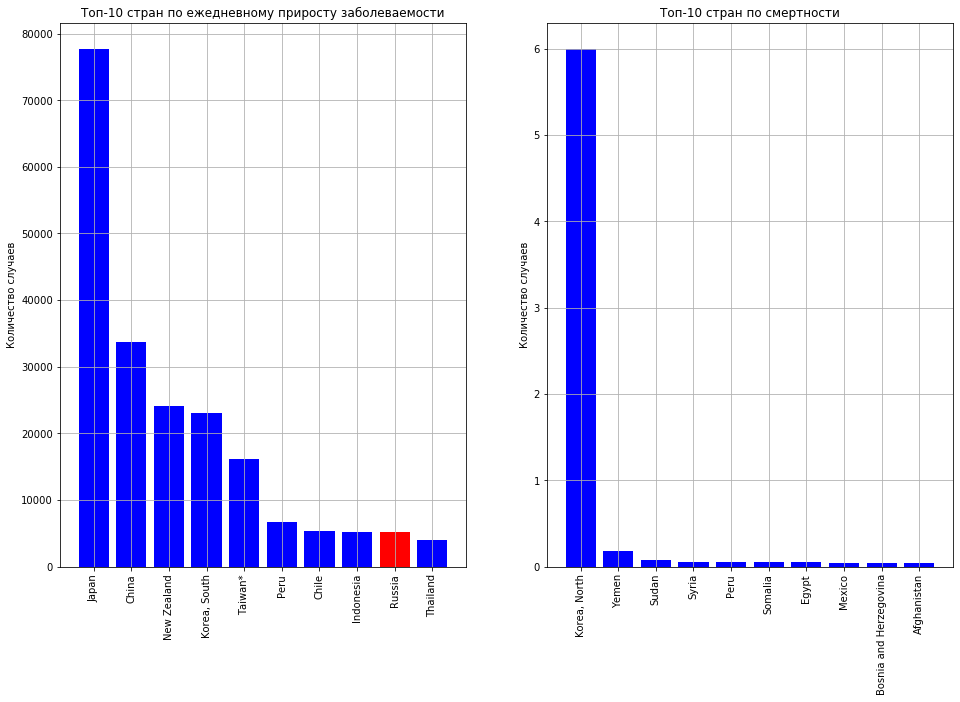

In [29]:
colors_growth = ['r' if c == "Russia" else 'b' for c  in top10_growth_countries] # Красным цветом отметим Россию
colors_mortality = ['r' if c == "Russia" else 'b' for c  in top10_mortality_countries]
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
# На левом графике построим диаграмму дневного прироста заболевших
ax[0].bar(top10_growth_countries, top10_growth, color=colors_growth)
ax[0].set_xticklabels(top10_growth_countries, rotation=90) # Поворот значений по оси X
ax[0].set_ylabel("Количество случаев") # Название оси Y
ax[0].set_title("Топ-10 стран по ежедневному приросту заболеваемости")
ax[0].grid()
# На правом графике построим диаграмму текущей смертности
ax[1].bar(top10_mortality_countries, top10_mortality, color=colors_mortality)
ax[1].set_xticklabels(top10_mortality_countries, rotation=90) # Поворот значений по оси X
ax[1].set_ylabel("Количество случаев") # Название оси Y
ax[1].set_title("Топ-10 стран по смертности")
ax[1].grid()

Отобразим смертности по странам мира на карте.<br>
Для этого подключим модуль mpl_toolkits.<br>
Если при импорте возникла ошибка, установите пакет "basemap" с помощью conda.<br>
```
conda install basemap
```
Либо с помощью pip:
```
pip install --user https://github.com/matplotlib/basemap/archive/master.zip
```

Подробная документация об этом модуле доступна на сайте [https://matplotlib.org/basemap/](https://matplotlib.org/basemap/)

In [30]:
# Эту переменную окружения необходимо задать из-за бага в basemap
# Подробнее: https://github.com/matplotlib/basemap/issues/419
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from mpl_toolkits.basemap import Basemap

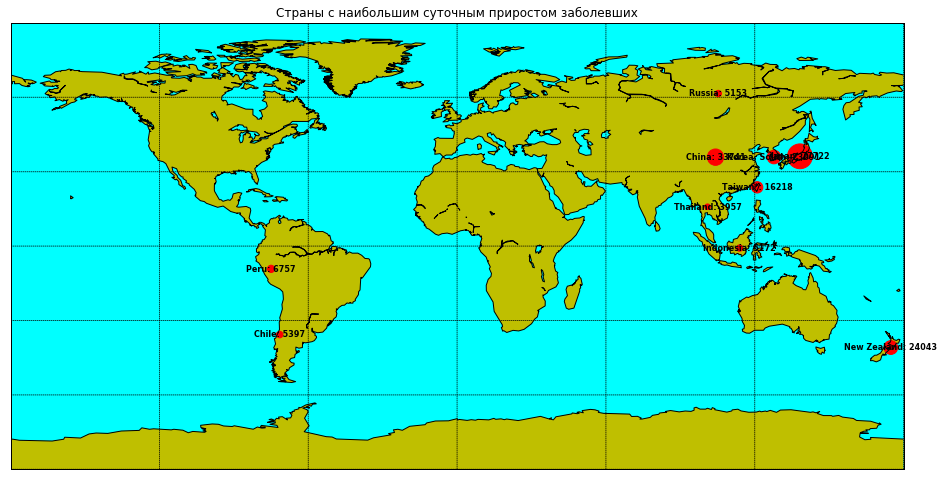

In [31]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
fig, axes = plt.subplots(1, figsize=(16, 10))
# Создаём объект карты и привязываем его к только что созданному графику axes
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=axes)
m.drawcoastlines() # Прорисовываем линии побережий
m.fillcontinents(color='y', lake_color='aqua') # Заливаем континенты указанными цветами
m.drawparallels(np.arange(-90.,91.,30.)) # Рисуем параллели
m.drawmeridians(np.arange(-180.,181.,60.)) # Рисуем меридианы
m.drawmapboundary(fill_color='aqua') # Рисуем границы карты и заливаем океаны указанным цветом

for country, growth in current_daily_growth_top10:
    lat, lon, pop = get_country_info(ref_data, country) # Получим широту и долготу страны
    radius = 5 * np.sqrt(growth / current_daily_growth_top10[0][1]) # Площадь круга пропорциональна приросту
    # Создаём объект круга красного цвета с аданным радиусом
    circle = plt.Circle((lon, lat), radius, color='r', fill=True)
    # Функция add_patch() позволяет нарисовать на графике объекты различной формы
    axes.add_patch(circle)
    # Функция annotate() позволяет отобразить текст в заданном месте графика
    axes.annotate(f"{country}: {growth}", xy=(lon, lat), fontsize=8,
                  verticalalignment='center', horizontalalignment='center',
                  weight='bold', color="black")

fig.set_facecolor('white') # Цвет фона
plt.title("Страны с наибольшим суточным приростом заболевших")
plt.show()

### 3D отображение

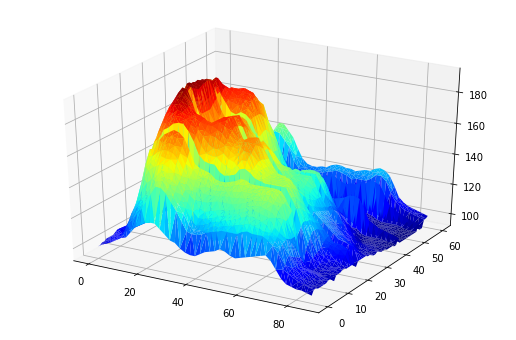

In [32]:
texture_level = 2

# Импортируем все необходимые библиотеки
from mpl_toolkits.mplot3d import Axes3D
 
# Получаем карту глубин для вулкана и задаем уровен детализации
filename = 'Python08-matplotlib_extra/volcano.csv'
data = pd.read_csv(filename)[::texture_level]
 
# С помощью unstack преобразуем таблицу в список координат (по сути поворот таблицы)
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# Categorical дает численное значение каждому уникальному объекту и делаем замену с помощью cat.codes
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Создаем график
fig = plt.figure(figsize=(9,6))
# gca - get current axes
ax = fig.gca(projection='3d')
# Отрисовываем триангулированную поверхность
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
# ax.scatter(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()

## Визуализация данных с помощью библиотеки seaborn

![alt text](Python08-matplotlib_extra/seaborn-logo.svg)

Seaborn является надстройкой над библиотекой matplotlib. Позволяет рисовать больше различных графиков, а также делает их более красивыми.

### Примеры графиков

Функция set (она же - set_theme) задаёт тему (стиль) графиков.

In [33]:
import seaborn as sns
sns.set(style="ticks")

# Загружаем встроенный датасет
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Функция pairplot автоматически визуализирует попарные совместные распределения данных по столбцам "Длина чашелистика", "Ширина чашелистика", "Длина лепестка" и "Ширина лепестка" в зависимости от вида ириса.

При этом в зависимости от вида ириса (поле "species") для отображения данных используются различные цвета.

Эти графики показывают, что виды ириса могут быть линейно классифицированы с достаточно высокой точностью.

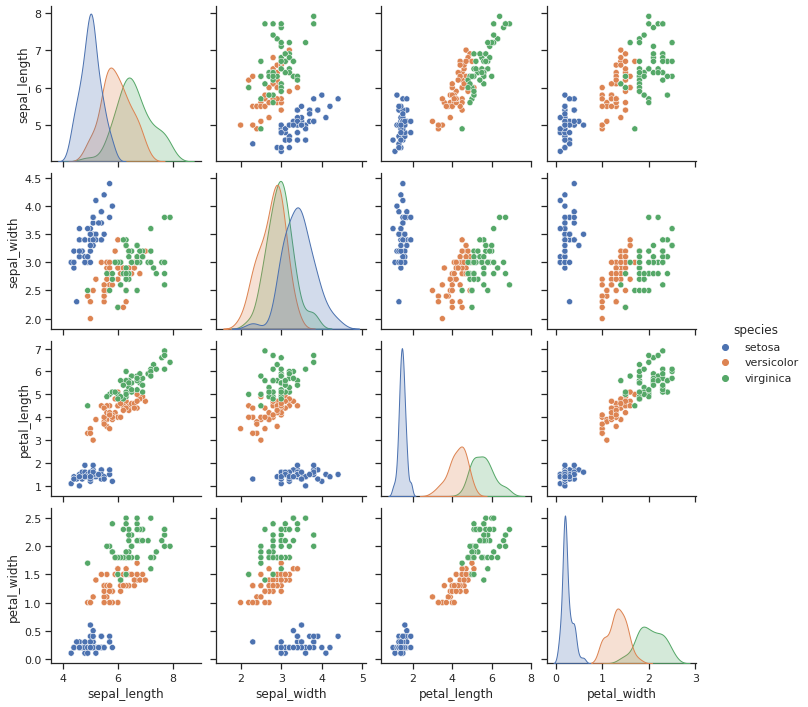

In [34]:
sns.pairplot(df, hue="species")
plt.show()

### Barplot

Функция barplot отображает столбцовые диаграммы.

Метод axhline отображает горизонтальную линию на заданном уровне.

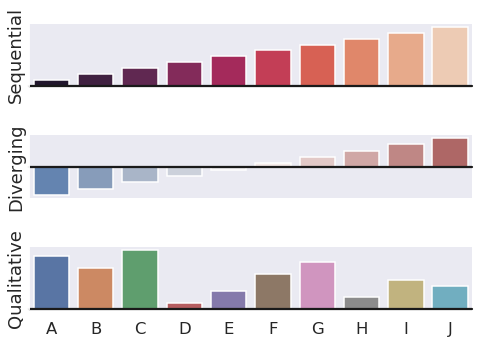

In [35]:
sns.set(style="dark", context="talk")
# Получаем объект для генерации рандома
rs = np.random.RandomState(8)

# Задаем параметры лэйаута для графиков
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)


sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
# axhline добавляет горизонт. линию на график
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# despine убирает верхнюю и правую линию на графике
sns.despine(bottom=True)
plt.setp(fig.axes, yticks=[])
plt.tight_layout(h_pad=2)

### KDEPlot

Функция kdeplot позволяет произвести ядерную оценку плотности (kernel density estimate - KDE).

In [36]:
# Загружаем встроенный датасет iris
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


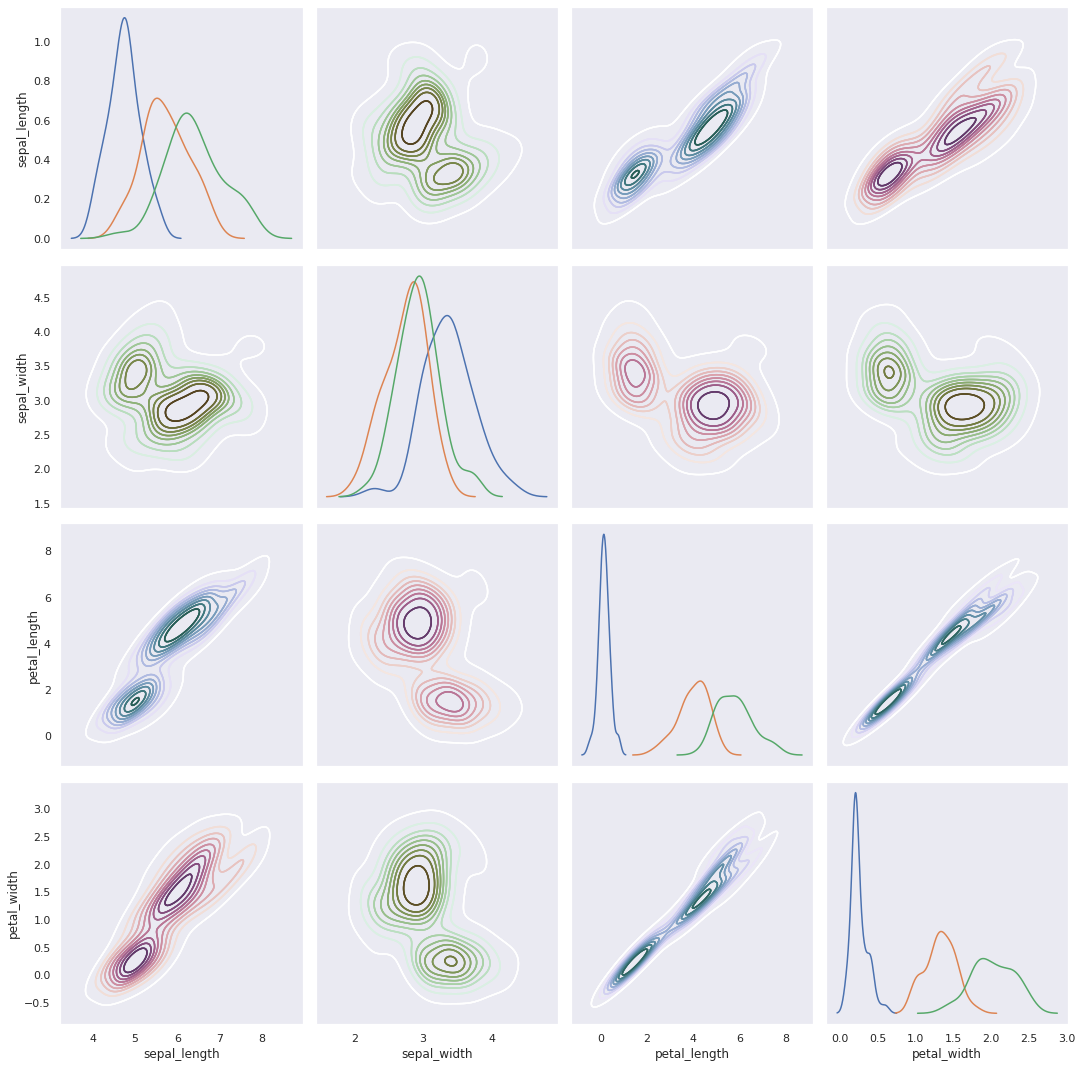

In [37]:
sns.set(style="dark")
rs = np.random.RandomState(50)

cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Задаем параметры лэйаута для графиков
fig, axes = plt.subplots(len(cols), len(cols), figsize=(15, 15))



for i, ax in enumerate(axes.flat):
    x = i % len(cols)
    y = i // len(cols)
    x_name = cols[x]
    y_name = cols[y]
    cmap = sns.cubehelix_palette(start=i, light=1, as_cmap=True)
    if x == y:
        for specie in pd.unique(df["species"]):
            sns.kdeplot(data=df[x_name][df["species"] == specie], ax=ax, label=specie, shade=False)
    else:
        for specie in pd.unique(df["species"]):
            sns.kdeplot(x=df[x_name], y=df[y_name], ax=ax, cmap=cmap, shade=False)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.label_outer()
    
fig.tight_layout()

### Heatmap

Функция heatmap позволяет рисовать "тепловые карты".

In [38]:
# Загружаем датасет полётов
flights_long = sns.load_dataset("flights")
flights_long

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [39]:
# Сделаем "решейп" таблицы, чтобы столбцы соответствовали годам, а строки - месяцам
flights = flights_long.pivot("month", "year", "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


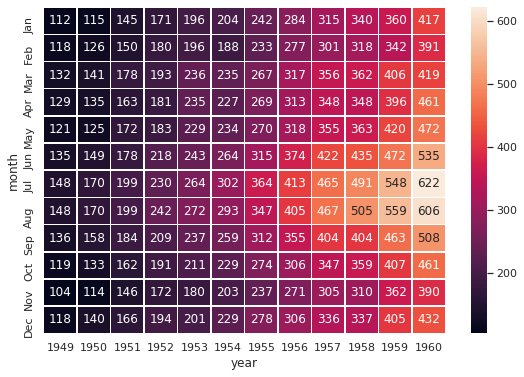

In [40]:
# Сделать красиво.
sns.set()

# Рисуем тепловую карту с числовым значением в каждой ячейке
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.show()

### Jointplot

Функция jointplot - ещё один удобные инструмент для визуализации совместных распределений

In [41]:
# Встроенный датасет чаевых
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


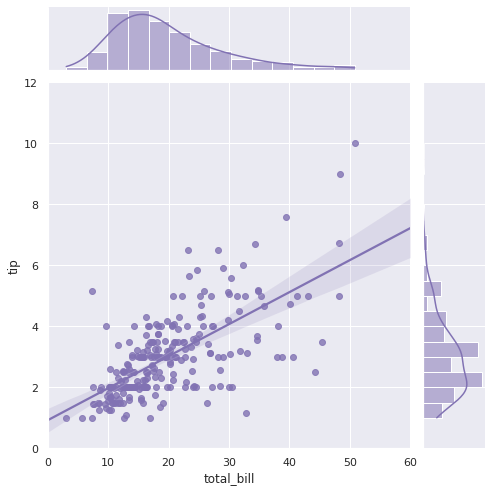

In [42]:
sns.set(style="darkgrid")
sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)
plt.show()

## Exploratory Data Analysis (EDA, разведывательный анализ данных)

EDA — анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

Вооружившись средствами визуализации проведём разведывательный анализ датасета Titanic.

In [43]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Для начала узнаем количество пустых элементов в таблице

In [44]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Функция catplot позволяет отображать категориальные данные.

Отобразим зависимость выживаемости от пола пассажира.

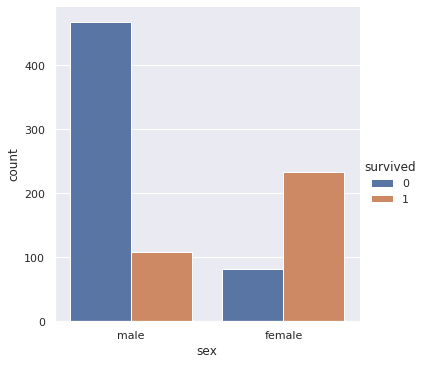

In [45]:
sns.catplot(x="sex", hue="survived", kind="count", data=titanic)
plt.show()

Отобразим зависимость выживаемости от того, является ли пассажир мужчиной, женщиной или ребёнком.

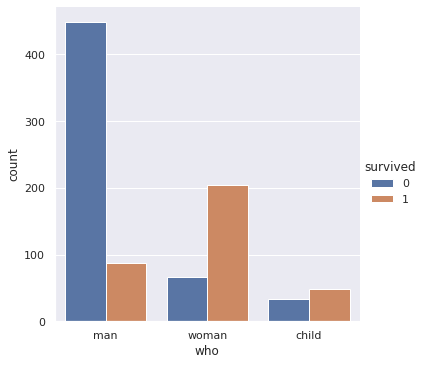

In [46]:
sns.catplot(x="who", hue="survived", kind="count", data=titanic)
plt.show()

Отобразим зависимость выживаемости от класса пассажира.

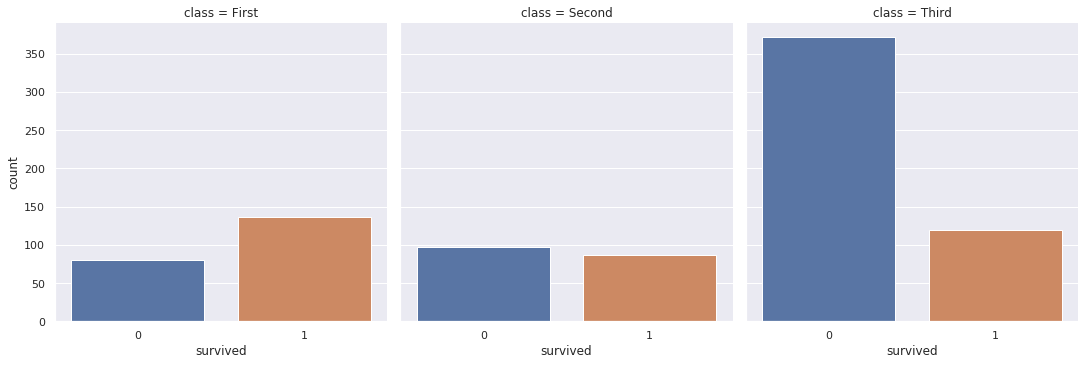

In [47]:
sns.catplot(x="survived", col="class", data=titanic, kind="count")
plt.show()

Отобразим зависимость выживаемости от порта, в котором пассажир сел на борт.

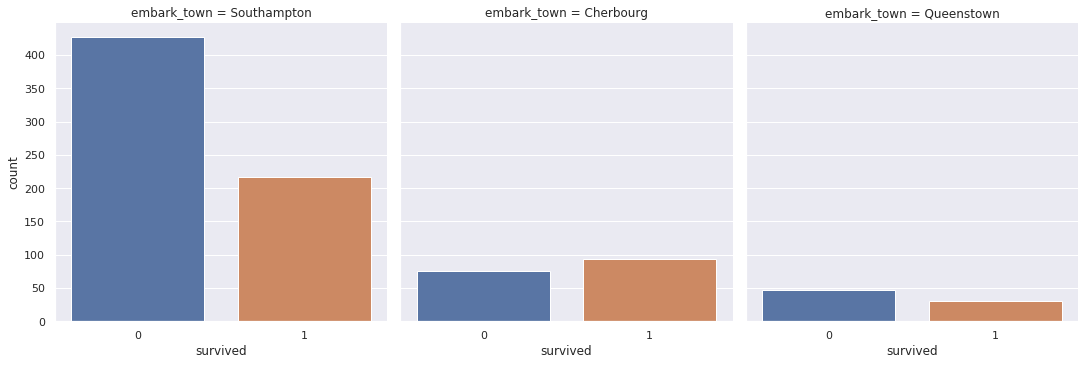

In [48]:
sns.catplot(x="survived", col="embark_town", data=titanic, kind="count")
plt.show()

Отобразим зависимость выживаемости от возраста пассажира.

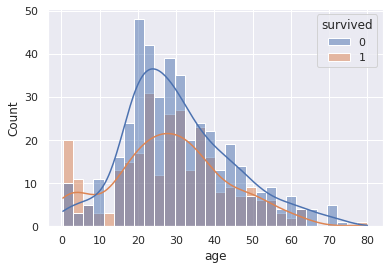

In [49]:
sns.histplot(x="age", hue="survived", data=titanic, bins=30, kde=True)
plt.show()

Выводы:

    1. Женщины и дети выжили с большей вероятностью, чем мужчины
    
    2. Меньше шансов выжить было у пассажиров третьего класса
    
    3. Меньше шансов выжить было у пассажиров, поднявшихся на борт в Саутгемптоне.

<div>
<img src="Python08-matplotlib_extra/streamlit-logo.png" width="500"/>
</div>

Библиотеки визуализации, о которых сегодня шла речь, легко интегрируются в систему Streamlit.

Эта система позволяет быстро и легко создать веб-приложение для анализа данных, запуска моделей, выбора гиперпараметров.

Подробнее: https://streamlit.io/

### Домашнее задание

Необходимо загрузить CSV файл со сценой (см. предыдущий семинар) и отобразить траектории.
Требования к визуализации:
1. Все траектории должны быть показаны на одном графике
2. Все траектории должны быть различимы (по цвету, типу линии, маркеру - как вам удобно)
4. Легенда должна отображать соответствие траекторий на графике и их идентификаторов из файла и типа объекта
5. Для упрощения идентификатор вида 00000000-0000-0000-0000-0000000ABCDF можно заменить на 0000000ABCDF (OBJ_TYPE)
6. Разрешение файла не более 2048х2048

Код создания файла необходимо сохранить под именем scene_plot.py (не ноутбук!).\
Полученный файл необходимо сохранить в формате PNG под именем scene.png.\
Эти файлы, как обычно, необходимо загрузить в бота с именем "seminar08".

Что (примерно) должно получиться:

<div>
<img src="Python08-matplotlib_extra/scene.png" width="800"/>
</div>